# 회귀(Regression)
- 독립 변수와 종속 변수 간의 상관 관계를 모델링하는 기법을 통칭

## 확률적 경사하강법(Stochastic Gradient Descent)
- 일반 경사하강법은 모든 학습 데이터에 대해 계산을 하기 때문에 시간이 오래 걸린다. 이를 보완하기 위하여 일부 데이터만 사용하여 계산하는 방법

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

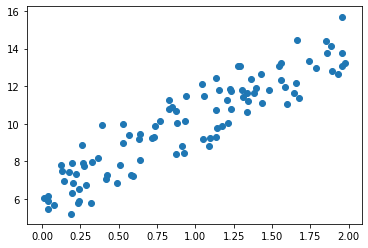

In [7]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)

## 선형 모델 => y = w0 + w1*x

In [10]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    y_pred = np.dot(X, w1) + w0
    print(get_cost(y, y_pred))
    diff = y_pred - y
    ones = np.ones((N, 1))
    w1_update = learning_rate * 2 * np.dot(X.T, diff) / N
    w0_update = learning_rate * 2 * np.dot(ones.T, diff) / N
    return w1_update, w0_update

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = 0
    w1 = 0
    for idx in range(iters):
        np.random.seed(idx)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0: batch_size]]
        sample_y = y[stochastic_random_index[0: batch_size]]

        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

w1, w0 = stochastic_gradient_descent_steps(X, y, 10, 1000)
print(w1, w0)

72.94924917490151
103.92191678626132
110.23181520462131
90.89025531574111
61.31153383371155
98.69312500308357
69.06557401264907
49.05066752458631
65.32821753150546
57.68528838657177
41.4267668412193
38.45591665620126
37.57052348263246
32.85807977235983
33.0118685140468
23.459403433020746
35.78917831955995
27.25470621966729
23.173371600144336
24.583145912093247
21.43238971549727
21.65094472220877
16.314801980735645
15.406809551391058
16.318178190320694
14.740518123995784
14.453708259702399
9.572898801922504
11.717972373212422
11.709527966340818
8.615536682564308
8.865461132106375
7.69044281741836
9.983533724356409
5.408387589982348
5.971337278775569
4.388987284670469
6.696217259028378
5.452343670431733
3.349966539121076
4.80651079894977
3.1316847817936773
1.8923700134616745
4.293676319259681
1.9255531137214166
2.5764062462910653
3.098290916332762
5.118930759685257
3.804683741505465
5.925294400191665
3.20903465400254
3.2693809438811607
1.780460762369565
2.912262120620331
2.52344428895471